## Dependencies

In [6]:
import numpy as np
import pandas as pd
import json
from eventgraphs import EventGraph
import matplotlib.pyplot as plt

from glob import glob
from collections import defaultdict
import pickle
import networkx as nx

from matplotlib import lines as mlines
from matplotlib import collections as mcollect

PLOT_STYLE = {'lines.linewidth':2,
              'font.size':16,
              'xtick.labelsize':16,
              'ytick.labelsize':16,
              'axes.labelsize' : 16,
              'mathtext.fontset':'cm',
              'mathtext.rm' :'serif',
              'text.usetex':False
             }


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
## Editing Dr Mellors Function to incude colouring - original function found in eventgraphs package - 
## https://github.com/empiricalstateofmind/eventgraphs

In [8]:
def plot_full_barcode_efficiently(eventgraph, delta_ub, top, ax=None):
    """
    Prints a barcode.
    Input:
        eventgraph (EventGraph):
        delta_ub (int):
        top (int):
        ax (matplotlib.axes._subplots.AxesSubplot): [default=None]
    Returns:
        ax (matplotlib.axes._subplots.AxesSubplot):
    """

    if ax is None:
        ax = plt.gca()

    filtered = eventgraph.filter_edges(delta_ub=delta_ub)
    segs = []
    events_loc = []
    color_map =[]
    tmin, tmax = 1e99, 0
    components = pd.Series(filtered.connected_components_indices()).value_counts()
    
    for ix, component in enumerate(components.index[:top]):
        component = filtered.events[filtered.events_meta.component == component]
        
        for _, event in component.iterrows():
            events_loc.append(event.type)
            segs.append(((event.time, ix), (event.time, ix + 1)))
            tmax = max(tmax, event.time)
            tmin = min(tmin, event.time)
    
    
    for i in events_loc:
        if i in ('renal_1', 'renal_2', 'renal_3', 'renal_4', 'renal_5'):
            i = 'renal'
            color_map.append('blue')

        elif i in ('medicine_1', 'medicine_2', 'medicine_3', 'medicine_4', 'medicine_5',' medicine_6',' medicine_7'
                              , 'medicine_8','medicine_9', 'medicine_10', ' medicine_11', 'medicine_12', 'medicine_13', 
                              'medicine_14','medicine_15', 'medicine_16', 'medicine_17', 'medicine_18', 'medicine_19', 
                              'medicine_20', 'medicine_21'):
            i = 'medicine'
            color_map.append('green')

        elif i in ('surgery_1', 'surgery_2', 'surgery_3', 'surgery_4', 'surgery_5',' surgery_6',' surgery_7'
                              , 'surgery_8','surgery_9', 'surgery_10','surgery_11','surgery_12','surgery_13', 'surgery_14'):

            i = 'surgery'
            color_map.append('red')


        elif i in ('elderly_1', 'elderly_2', 'elderly_3', 'elderly_4', 'elderly_5'):

            i = 'elderly'
            color_map.append('brown')


        elif i in ('haematology_1', 'haematology_2', 'haematology_3', 'haematology_4'):

            i = 'haematology'
            color_map.append('orange')



        elif i in ('oncology_1', 'oncology_2'):

            i = 'oncology'
            color_map.append('yellow')



        elif i in ('respiratory_1', 'respiratory_2'):
            i = 'respiratory'
            color_map.append('grey')



        elif i in ('critical care_1', 'critical care_2', 'critical care_3'):

            i = 'critical care'
            color_map.append('black')



        elif i in ('cardiology', 'ward na', 'cancer_1', 'OPD_1'):

            i = 'cardiology/ward_na/cancer_1/OPD_1'
            color_map.append('green yellow')

        else:
            color_map.append('purple')
            continue

    
    
    

    
    ln_coll = mcollect.LineCollection(segs, linewidths=1, colors=color_map)
    bc = ax.add_collection(ln_coll)
    ax.set_ylim((0, top + 1))
    ax.set_xlim((tmin, tmax))
    return ax

In [9]:
def plot_barcode(eventgraph, delta_ub, top, ax=None):
    """
    Prints a barcode.
    Input:
        eventgraph (EventGraph):
        delta_ub (int):
        top (int):
        ax (matplotlib.axes._subplots.AxesSubplot): [default=None]
    Returns:
        ax (matplotlib.axes._subplots.AxesSubplot):
    """

    if ax is None:
        ax = plt.gca()
    bc = plot_full_barcode_efficiently(eventgraph, delta_ub, top, ax)

    ax.set_ylim((0, top))
    ax.set_yticks(np.arange(0, top), minor=False)
    ax.set_yticklabels(['C{}'.format(x) for x in np.arange(1, top + 1)])

    for tick in ax.yaxis.get_majorticklabels():
        tick.set_verticalalignment("bottom")

    ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.5)
    ax.xaxis.grid(False)
    ax.tick_params(axis='x', length=5, which='major', bottom=True, top=False)

    return ax

# CPE

In [10]:
home_dir = "C:\\Users\\matth\\Documents\\IMPERIAL\\PROJECT\\timestamped_data.csv"

cpe = pd.read_csv(home_dir)

In [11]:
EG_86 = EventGraph.from_pandas_eventlist(cpe, graph_rules='teg')
EG_86.event_graph_rules['delta_cutoff'] = 86 #days
EG_86.build(verbose=False)
EG_86.calculate_edge_motifs() # in order to include_graph_data
nx_eg_86 = EG_86.create_networkx_event_graph(include_graph_data=True)

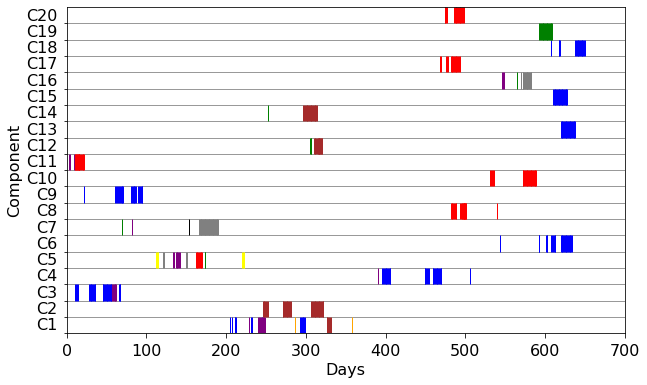

In [12]:
with plt.style.context(['seaborn-paper', PLOT_STYLE]):

    start = 0
    interval = 700 ##<--- in a year 
    subset = EG_86.events[(EG_86.events.time>start) & (EG_86.events.time<=start+interval)]
    featured_data = EG_86.filter_events(subset.index)

    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)

    plot_barcode(featured_data, delta_ub=86, top=20, ax=ax);

    ax.set_xticks(np.linspace(start, start+interval, 8))
    ax.set_xlim(0,700) # need to change this labeling

    ax.set_xlabel('Days')
    ax.set_ylabel('Component')
    
plt.show()

# Covid

In [13]:
covid = pd.read_csv('./covid_timestamped_data.csv')

In [14]:
EG_24 = EventGraph.from_pandas_eventlist(covid, graph_rules='teg')
EG_24.event_graph_rules['delta_cutoff'] = 24 #days
EG_24.build(verbose=False)
EG_24.calculate_edge_motifs() # in order to include_graph_data
nx_eg_24 = EG_24.create_networkx_event_graph(include_graph_data=True)

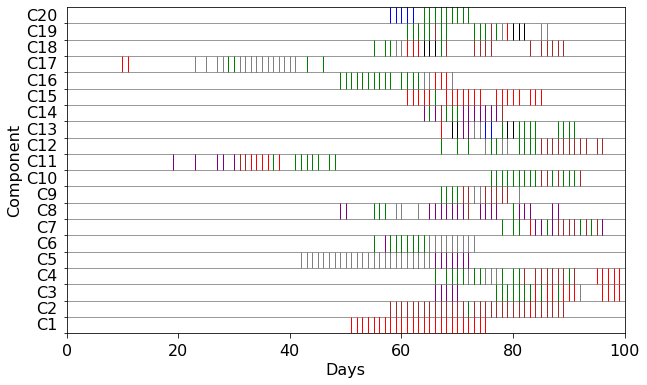

In [15]:
with plt.style.context(['seaborn-paper', PLOT_STYLE]):

    start = 0
    interval = 100 ##<--- in a year 
    subset = EG_24.events[(EG_24.events.time>start) & (EG_24.events.time<=start+interval)]
    featured_data = EG_24.filter_events(subset.index)

    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)

    plot_barcode(featured_data, delta_ub=24, top=20, ax=ax);

    ax.set_xticks(np.linspace(start, start+interval, 6))
    ax.set_xlim(0,100) # need to change this labeling

    ax.set_xlabel('Days')
    ax.set_ylabel('Component')
    
plt.show()